# Проверка гипотез для увеличения прибыли интернет-магазина 

**Описание проекта:** 
есть списоск гипотез, которые надо проверить и понять, принесут ли они нам увеличение выручки или нет. Задача приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

## План работы

**Часть 1. Приоритизация гипотез.**
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста.Проанализировать A/B-тест:**
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его.

**Сделать общий вывод**

# Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
# прочитаем первый файл
pd.options.display.max_colwidth = 150
data = pd.read_csv('/datasets/hypothesis.csv')
data 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [3]:
# добавим столбец ICE
data['ICE'] = (data['Impact'] * data['Confidence']) / data['Efforts']
data.sort_values(by = 'ICE', ascending = False).round(3)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


Самый высокий приоритет по ICE у гипотезы "Запустить акцию, дающую скидку на товар в день рождения", на втором месте гипотеза "Добавить два новых канала привлечения трафика,", на третьем - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	". Последнее место занимает гипотеза об изменении цвета фона главной страницы.

**Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [4]:
# добавим столбец RICE
data['RICE'] = (data['Impact'] * data['Confidence'] * data['Reach']) / data['Efforts']
data.sort_values(by = 'RICE', ascending = False).round()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0,16.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


По приоритизации по RICE на первом месте стоит гипотеза о добавлении формы подписки на все основные страницы, на втором месте - добавление блоков рекомендаций товаров, на третьем - добавление двух новых каналов привлечения трафика. На последнем месте опять стоит гипотеза об изменении цвета фона главной страницы.

**Вывод:**
Самый высокий приоритет по ICE у гипотезы "Запустить акцию, дающую скидку на товар в день... ", на втором месте гипотеза "Добавить два новых канала привлечения трафика,", на третьем - "Добавить форму подписки на все основные страницы...". Последнее место занимает гипотеза об изменении цвета фона главной страницы.

По приоритизации по RICE на первом месте стоит гипотеза о добавлении формы подписки на все основные страницы, на втором месте - добавление блоков рекомендаций товаров, на третьем - добавление двух новых каналов привлечения трафика. На последнем месте опять стоит гипотеза об изменении цвета фона главной страницы.

Сравнивая методы, видим, что при влиянии параметра охвата количества пользователей на первое место выходит гипотеза о добавлении формы подписки на все основные страницы. Она имеет максимальный охват - 10. Гипотеза о добавлении блоков рекомендаций имеет reach 8 и поэтому выходит на второе место. 

При оценки приоритетов по RICE, в отличие от методы ICE, мы учитываем фактор Reach, который влияет на приоритизацию.

# Часть 2. Анализ A/B-теста

Ознакомимся с данными.

In [5]:
# загрузим данные из первого файла
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
# загрузим данные из второго файла
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
# найдем количество групп в А/В тесте
visitors['group'].unique()

array(['A', 'B'], dtype=object)

В тесте участвует всего две группы.

Найдем дату начала и окончания теста.

In [8]:
# найдем дату начала
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [9]:
# найдем дату окончания теста
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

Тест длился один месяц. Начало 1 августа 2019 года и конец 31 августа 2019 года.

Посмотрим, сколько пользователей содержится в каждой группе.


In [10]:
# количество пользователей по группам
orders[['visitorId', 'group']].groupby('group').agg({'visitorId':'count'})

,visitorId
group,
A,557
B,640


В группе А 557 пользователей, в группе B - 640.

Вычислим вероятность попадания пользователей в обе группы.

In [11]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

In [12]:
# создаем список пользователей с уникальными visitorId:
double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()
double_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [13]:
# удаляем этих пользователей из таблицы
orders = orders.query('visitorId not in @double_users')

In [14]:
# смотрим, как изменилась таблица
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Всего 1 пользователь был в двух гурппах одновременно, это не повлияет на результаты анализа.

**1. Построим график кумулятивной выручки по группам.**

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [16]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitorId' : 'nunique', 'transactionId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [17]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Text(0.5, 1.0, 'График кумулятивной выручки по группам')

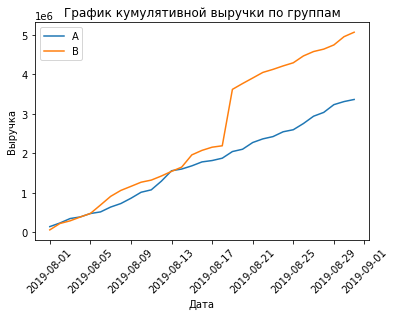

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')

В течение всего периода выручка растет, это хорошо. На графике видно, что больший доход приносит группа B, однако у нее есть резкий скачок 17 августа, на это следует обратить внимание при дальнейшем анализе.

**2. Построим график кумулятивного среднего чека по группам.**

Text(0.5, 1.0, 'График кумулятивного среднего чека по группам')

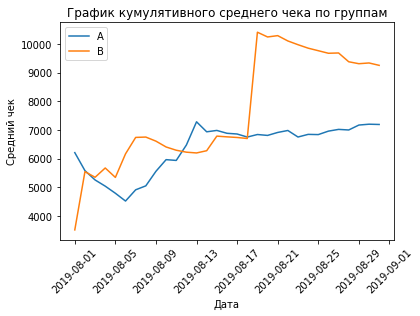

In [20]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')

Видим резкий скачок после 17 августа в группе B. Почему-то пользователи стали делать более дорогие заказы, либо количество заказов резко возросло. В группе А к концу теста постепенно средний чек выравнивается.

**3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.**

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A')

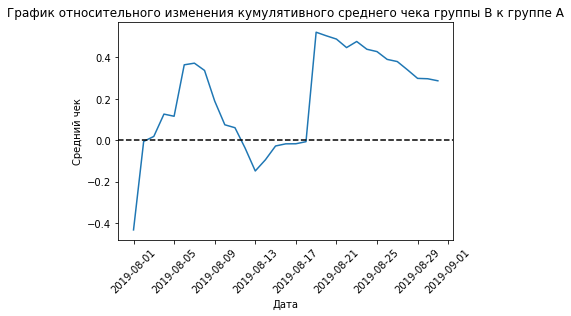

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

График неравномерный, значит есть скачки крупных заказов или выбросов.

**4. Построим график кумулятивного среднего количества заказов на посетителя по группам.**

(18109.0, 18140.0, 0.0, 0.038)

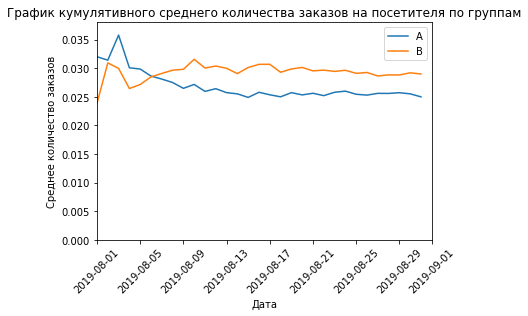

In [22]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

# задаем масштаб осей
plt.axis([pd.Timestamp('2019-08-01'), pd.Timestamp('2019-09-01'), 0, 0.038])

В начале теста у обеих групп были скачки, к концу теста значения шли практически параллельно, но среднее количество заказов у группы B выше, чем у группы А.

**5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**

(18109.0, 18140.0, -0.6, 0.6)

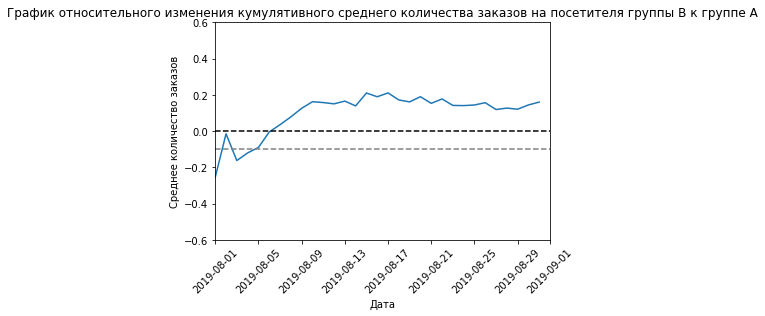

In [42]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([pd.Timestamp('2019-08-01'), pd.Timestamp('2019-09-01'), -0.6, 0.6])

В начале были провалы у группы В в среднем количестве заказов, но дальше был постоянный рост с небольшим уменьшением, к конце теста график снова начал возрастать. Пока что рано делать какие-либо выводы, сначала стоит разобраться с аномалиями.

**6. Построим точечный график количества заказов по пользователям.**

In [24]:
# посчитаем количество заказов по пользователям
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_users.columns =  ['visitorId', 'orders']

Text(0, 0.5, 'Количество заказов')

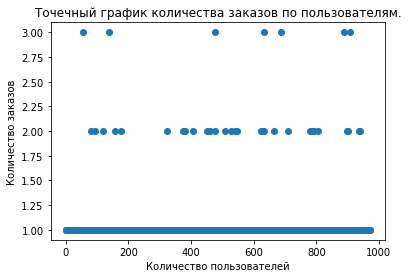

In [25]:
# построим точечный график
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Точечный график количества заказов по пользователям.')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')

Чаще всего заказ делали единично и достаточно часто - 2 раза. 

**7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.**

In [26]:
np.percentile(orders_by_users, [95, 99])

array([3.82496640e+09, 4.18419384e+09])

Не более 5% пользователей делало 3 заказа и не более 1% - 4 заказа.   

**8. Построим точечный график стоимостей заказов.**

Text(0.5, 1.0, 'Точечный график стоимостей заказов')

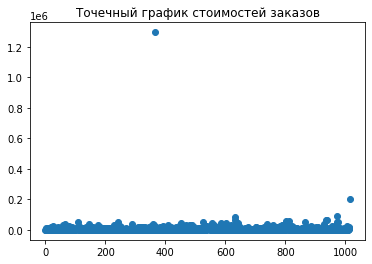

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')

Видно, что присутствуют явные аномалии в общем графике.

**9. Посчитаем 95-й и 99-й перцентили стоимости заказов.**

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% стоимости заказов составляют менее 28 000 и не более 1% - 58 233. За порог возьмем сумму 35 000. Все, что выше будем считать аномалиями.

**10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

Сформулируем гипотезы. 

**Нулевая:** различий в среднем количестве заказов между группами нет.   
**Альтернативная:** различия в среднем между группами есть.

Подготовим данные:  
`date` — дата;  
`ordersPerDateA` — количество заказов в выбранную дату в группе A;    
`revenuePerDateA` — суммарная выручка в выбранную дату в группе A;  
`ordersPerDateB` — количество заказов в выбранную дату в группе B;  
`revenuePerDateB` — суммарная выручка в выбранную дату в группе B;  
`ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;  
`revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;  
`ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;  
`revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;  
`visitorsPerDateA` — количество пользователей в выбранную дату в группе A;  
`visitorsPerDateB` — количество пользователей в выбранную дату в группе B;  
`visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;  
`visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B. 

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов.  

`ordersByUsersA['orders']` - cписок с количеством заказов для каждого из пользователей.  
Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах. Создадим объект pd.Series нужной длины.

In [31]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18291, dtype: int64

Объединим последовательности.

In [32]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 440    1
 441    1
 442    1
 443    1
 444    1
 Name: orders, Length: 445, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18286    0
 18287    0
 18288    0
 18289    0
 18290    0
 Name: orders, Length: 18291, dtype: int64]

In [33]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выведем относительный прирост среднего числа заказов группы B.

In [34]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("Значение p-value для конверсий: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы B:{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Значение p-value для конверсий: 0.011
Относительный прирост конверсии группы B:0.160


Первое число `p-value = 0.017` меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост группы B равен 13.8%.

**11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

Проверим статистическую значимость различий в среднем чеке между сегментами.

**Нулевая гипотеза:** различий в среднем чеке между группами нет.   
**Альтернативная гипотеза:** различия в среднем чеке между группами есть. 

In [35]:
print('Значение p-value для среднего чека: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение p-value для среднего чека: 0.829
Относительный прирост среднего чека группы B: 0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

<div class="alert alert-success">
<h2> Комментарий ревьюера v2<a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Согласна!

</div>

**12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

В прошлых выводах 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям.  
95-й и 99-й перцентили количества заказов на одного пользователя равны 3 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 35 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 35 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`. 

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)
abnormalUsers.shape[0]

30

Вычислили 30 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 

In [37]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [38]:
print('Значение p-value для конверсий: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Значение p-value для конверсий: 0.010
Относительный прирост конверсии группы B: 0.168


Результаты сильно отличаются от "сырых" данных. Аномалии сильно влияют на картину статистической значимости различий в среднем количестве заказов между группами теста.

<div class="alert alert-success">
<h2> Комментарий ревьюера v2<a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Супер, двигаемся дальше!

</div>

**13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

In [39]:
print(
    'Значение p-value для среднего чека: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека группы B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Значение p-value для среднего чека: 0.976
Относительный прирост среднего чека группы B: -0.000


P-value немного увеличился, разница между сегментами сократилась примерно на 28%.

**14. Примем решение по результатам теста.**

По результатам теста выявили существенные различия по среднему количеству заказов: группа В показывает лучше результаты, чем группа А. Различия в среднем чеке не обнаружены. Это значит, что надо остановить тест.

<div class="alert alert-success">
<h2> Комментарий ревьюера v2<a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Такой результат намного лучше!

</div>

# Выводы:

Первым делом мы ознакомились с предоставленными данными. Для приоритизации гипотез использовали методы ICE и RICE. 

Выяснили, что самый высокий приоритет по ICE у гипотезы "Запустить акцию, дающую скидку на товар в день... ", на втором месте гипотеза "Добавить два новых канала привлечения трафика,", на третьем - "Добавить форму подписки на все основные страницы...". Последнее место занимает гипотеза об изменении цвета фона главной страницы.

По приоритизации по RICE на первом месте стоит гипотеза о добавлении формы подписки на все основные страницы, на втором месте - добавление блоков рекомендаций товаров, на третьем - добавление двух новых каналов привлечения трафика. На последнем месте опять стоит гипотеза об изменении цвета фона главной страницы.

Сравнивая методы, видим, что при влиянии параметра охвата количества пользователей на первое место выходит гипотеза о добавлении формы подписки на все основные страницы. Она имеет максимальный охват - 10. Гипотеза о добавлении блоков рекомендаций имеет reach 8 и поэтому выходит на второе место. 

При оценки приоритетов по RICE, в отличие от методы ICE, мы учитываем фактор Reach, который влияет на приоритизацию.

Вторая асть проекта была посвящена A/В анализу.

Мы ознакомились с данными, построили график кумулятивной выручки по группам. Увидели, что в течение всего периода выручка растет, это хорошо. На графике видно, что больший доход приносит группа B, однако у нее есть резкий скачок 17 августа, на это следует обратить внимание при дальнейшем анализе.

Далее построили график кумулятивного среднего чека по группам. Резкий скачок после 17 августа в группе B. Почему-то пользователи стали делать более дорогие заказы, либо количество заказов резко возросло. В группе А к концу теста постепенно средний чек выравнивается.

Построили график относительного изменения кумулятивного среднего чека группы B к группе A. График неравномерный, значит есть скачки крупных заказов или выбросов.

Построили график кумулятивного среднего количества заказов на посетителя по группам. В начале теста у обеих групп были скачки, к концу теста значения шли практически параллельно, но среднее количество заказов у группы B выше, чем у группы А.


Построили график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.  В начале были провалы у группы В в среднем количестве заказов, но дальше был постоянный рост с небольшим уменьшением, к конце теста график снова начал возрастать. Пока что рано делать какие-либо выводы, сначала стоит разобраться с аномалиями.

Построили точечный график количества заказов по пользователям. Чаще всего заказ делали единично и достаточно часто - 2 раза. 

По данным 95-го и 99-го перцентилей не более 5% пользователей делало 3 заказа и не более 1% - 4 заказа. В общем графике присутствуют аномалии,

По данным 95-го и 99-го перцентилей не более 5% стоимости заказов составляют менее 28 000 и не более 1% - 58 233. Возьмем за гарницу отметку в 35 000.

По данным теста отвергли гиоптезу о том, что статистически значимых различий в среднем числе заказов между группами нет. Относительный прирост группы B равен 13.8%.
Проверили статистическую значимость различий в среднем чеке между сегментами и выяснили, что различий в среднем чеке между группами нет. 

В группе по сырым  данным выявили 30 аномалий, которые влияют на итоговые выводы. Результаты "очищенных" сильно отличаются от "сырых" данных.

По результатам теста выявили существенные различия по среднему количеству заказов: группа В показывает лучше результаты, чем группа А. Различия в среднем чеке это подтверждают. Это значит, что надо остановить тест.

<div class="alert alert-success">
<h2> Комментарий ревьюера v2<a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Саша, привет! Молодец, оперативно и верно доработала проект. Благодарю за обратную связь, работа принята, удачи в обучении!)

</div>

<div style="border:solid Chocolate 2px; padding: 40px">
Саша, давай подведем итоги. Ты большая молодец, что старалась и проделала такую большую работу. Мне понравилось, что ты наполнила проект развернутыми выводами и наглядно продемонстрировала каждое задание:) 
    
    Разберем над чем стоит поработать:

    1. Рекомендую:
    - вывести гипотезы полностью;
    - провести доп. исследование датафреймов;
    - дополнить выводы;
    - указать границы нормальных и аномальных заказов;
    - подписать p-value и статистическую значимость.
        
    Пересмотри работу и исправь ошибки. Обязательно пиши, если я могу тебе еще чем-то помочь. Удачи!)
  

<div class = "alert alert-info"> <b> Комментарий студента: </b> спасибо за полезные советы и рекомендации! Постаралась все исправить. </div>